In [1]:
from specialist_data import transformed
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

data = transformed.data.copy()

def evolve_stage(clf, stage, interval=2):
    train_data = data.query(f'index > {stage}000 and index < {stage + interval}000')
    test_data = data.query(f'index > {stage + interval}000 and index < {stage + interval*2}000')
    transformed.set_data(train_data)
    clf = clf.partial_fit(transformed.X, transformed.level, ['bad', 'good'])
    transformed.set_data(test_data)
    return clf.score(transformed.X, transformed.level)
    

Iteration 1, loss = 0.27980145
Iteration 2, loss = 1.03246906
Iteration 3, loss = 0.75845001
Iteration 4, loss = 0.70156848
Iteration 5, loss = 0.68305159
Iteration 6, loss = 0.65222941
Iteration 7, loss = 0.61438236
Iteration 8, loss = 0.63365835
Iteration 9, loss = 0.61553830
Iteration 10, loss = 0.59303393
Iteration 11, loss = 0.58963368
Iteration 12, loss = 0.58273430
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 13, loss = 0.56018310
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 14, loss = 0.55596607
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.


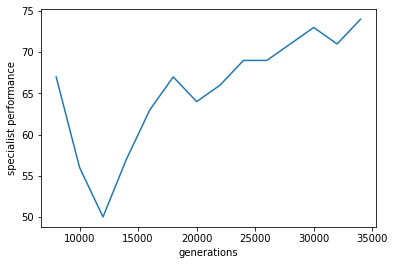

In [3]:
import matplotlib.pyplot as plt

clf = MLPClassifier(
    hidden_layer_sizes=(64,64,64,64,64),
    alpha=0.000001,
    max_iter=2000,
    activation="tanh",
    verbose=10,
    random_state=42,
    tol=0.000005
)

results = []
stages = []
for stg in range(8, 36, 2):
    r = evolve_stage(clf, stg)
    results.append(int(r*100))
    stages.append(stg*1000)

plt.plot(stages, results)
plt.xlabel('generations')
plt.ylabel('specialist performance')
plt.show()